#Python数据分析

##1热身练习

In [1]:
names = ['关羽', '张飞', '赵云', '马超', '黄忠']
courses = ['语文', '数学', '英语']

In [2]:
import random

scores = [[random.randrange(60, 100) for _ in range(3)] for _ in range(5)]
scores

[[85, 61, 90], [71, 68, 78], [71, 63, 93], [87, 81, 98], [85, 68, 72]]

In [3]:
def mean(nums):
    """求均值"""
    return sum(nums) / len(nums)


def variance(nums):
    """求方差"""
    mean_value = mean(nums)
    return mean([(num - mean_value) ** 2 for num in nums])


def stddev(nums):
    """求标准差"""
    return variance(nums) ** 0.5

In [4]:
# 统计每个学生的平均分

for i in range(len(names)):
    print(f'{names[i]}的平均分是: {sum(scores[i]) / len(scores[i]):.1f}分')
    

关羽的平均分是: 78.7分
张飞的平均分是: 72.3分
赵云的平均分是: 75.7分
马超的平均分是: 88.7分
黄忠的平均分是: 75.0分


In [5]:
# 统计每门课的最高分，最低分，标准差
for idx, course in enumerate(courses):
    temp = [scores[i][idx] for i in range(len(names))]
    max_score, min_score = max(temp), min(temp)
    print(f'{course}考试最高分：{max_score}分')
    print(f'{course}考试最低分：{min_score}分')
    print(f'{course}成绩标准差：{stddev(temp):.1f}分')
    # print(f'{course}考试最高分：{}')

语文考试最高分：87分
语文考试最低分：71分
语文成绩标准差：7.2分
数学考试最高分：81分
数学考试最低分：61分
数学成绩标准差：7.0分
英语考试最高分：98分
英语考试最低分：72分
英语成绩标准差：9.7分


In [6]:
# 将学生及其考试成绩以行的方式输出（按平均分从高到低排序）
results = {name: temp for name, temp in zip(names, scores)}
sorted_key = sorted(results, key=lambda x: mean(results[x]), reverse=True)
for key in sorted_key:
    verbal, math, english = results[key]
    print(f'{key}\t{verbal}\t{math}\t{english}')

马超	87	81	98
关羽	85	61	90
赵云	71	63	93
黄忠	85	68	72
张飞	71	68	78


### Pyhton数据分析三大神器

1.NumPy - 保存数据，完成批量的运算和处理

2.pandas - 封装了数据分析需要的各种方法

3.matplotlib - 绘制统计图表

%pip install numpy pandas matplotlib

%pip install openpyxl


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
np.__version__

'1.24.2'

In [ ]:
pd.__version__

'2.0.0'

In [ ]:
scores

[[95, 81, 66], [95, 60, 88], [72, 96, 82], [99, 80, 60], [84, 78, 96]]

In [ ]:
scores = np.array(scores)
scores

array([[95, 81, 66],
       [95, 60, 88],
       [72, 96, 82],
       [99, 80, 60],
       [84, 78, 96]])

In [ ]:
np.round(scores.mean(axis=1), 1)

array([80.7, 81. , 83.3, 79.7, 86. ])

In [ ]:
scores.max(axis=0)

array([99, 96, 96])

In [ ]:
scores.min(axis=0)

array([72, 60, 60])

In [ ]:
scores.std(axis=0)

array([ 9.85900604, 11.45425685, 13.46996659])

In [ ]:
scores.var(axis=0) ** 0.5

array([ 9.85900604, 11.45425685, 13.46996659])

In [ ]:
scores_df = pd.DataFrame(data=scores, columns=courses, index=names)
scores_df

,语文,数学,英语
关羽,95,81,66
张飞,95,60,88
赵云,72,96,82
马超,99,80,60
黄忠,84,78,96


In [ ]:
np.round(scores_df.mean(axis=1), 1)

关羽    80.7
张飞    81.0
赵云    83.3
马超    79.7
黄忠    86.0
dtype: float64

In [ ]:
scores_df['平均分'] = np.round(scores_df.mean(axis=1), 1)
scores_df

,语文,数学,英语,平均分
关羽,95,81,66,80.7
张飞,95,60,88,81.0
赵云,72,96,82,83.3
马超,99,80,60,79.7
黄忠,84,78,96,86.0


In [ ]:
scores_df.to_excel('考试成绩表.xlsx')

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei', ]
plt.rcParams['axes.unicode_minus'] = False

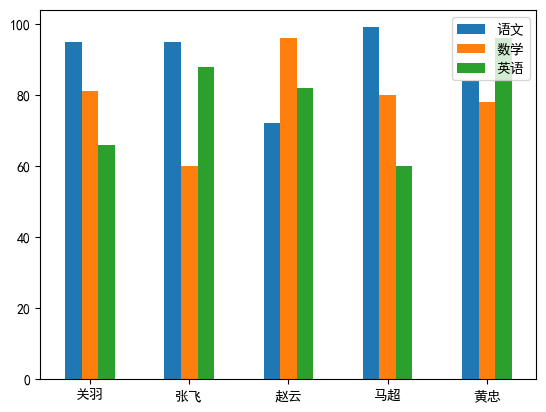

In [ ]:
scores_df.plot(kind='bar', y=['语文', '数学', '英语'])
plt.xticks(rotation=0)
plt.savefig('成绩柱状图.png')
plt.show()

In [ ]:
scores_df.max()

语文     99.0
数学     96.0
英语     96.0
平均分    86.0
dtype: float64

In [ ]:
scores_df.min()

语文     72.0
数学     60.0
英语     60.0
平均分    79.7
dtype: float64

In [ ]:
scores_df.std()

语文     11.022704
数学     12.806248
英语     15.059880
平均分     2.528438
dtype: float64

### Numpy的应用

In [ ]:
array1 = np.array([1, 2, 10, 20, 100], dtype=np.int64)
array1

array([  1,   2,  10,  20, 100], dtype=int64)

In [ ]:
array2 = np.arange(1, 100)
array2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# 固定间隔的数组
array3 = np.linspace(-5, 5, 101)
array3

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [ ]:
array4 = np.random.random(10)
array4

array([0.11398284, 0.32265178, 0.45514732, 0.28605022, 0.84798951,
       0.14167412, 0.06228649, 0.53845508, 0.39032479, 0.42889646])

In [ ]:
array5 = np.random.randint(1, 11, 10)
array5

array([ 8,  1,  6,  6,  3,  4, 10,  7,  1, 10])

In [ ]:
array6 = np.random.normal(0, 1, 5000)
array6

array([-0.63695584,  0.20564786, -1.1527226 , ...,  1.71132065,
       -0.54789464, -0.0159767 ])

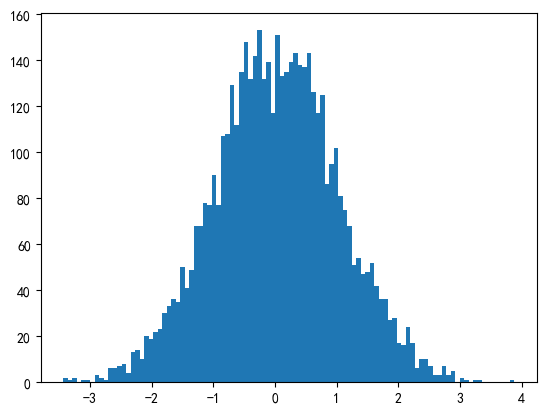

In [ ]:
plt.hist(array6, bins=100)
plt.show()

In [ ]:
def fib(num):
    a, b = 0, 1
    for _ in range(num):
        a, b = b, a + b
        yield a
    
gen = fib(20)
gen

<generator object fib at 0x000001CF67A5F790>

In [ ]:
array7 = np.fromiter(gen, dtype=np.int64)
array7

array([   1,    1,    2,    3,    5,    8,   13,   21,   34,   55,   89,
        144,  233,  377,  610,  987, 1597, 2584, 4181, 6765], dtype=int64)

In [ ]:
with open(r'C:\Users\wdl\Python数据分析\data\news.txt', 'r', encoding='utf-8') as file:
    temp = np.fromregex(file, r'\d+(?=百万美元)', dtype=[('aaa', np.int64)])
temp['aaa']

array([1241513259, 6098509385], dtype=int64)

In [ ]:
array1.size

5

In [ ]:
array1.shape

(5,)

In [ ]:
array1.ndim

1

In [ ]:
array1.dtype

dtype('int64')

In [ ]:
array1.itemsize

8

In [ ]:
#所有元素所占空间
array1.nbytes

40

In [ ]:
array8 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.int64)
array8

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int64)

In [ ]:
array8.size

9

In [ ]:
array8.shape

(3, 3)

In [ ]:
# 维度
array8.ndim

2

In [ ]:
array8.dtype

dtype('int64')

In [ ]:
temp = np.arange(1, 11)
array9 = temp.reshape(5, 2)
array9

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [ ]:
array10 = np.random.randint(60, 101, (5, 3))
array10

array([[ 84,  94,  82],
       [ 96,  63,  97],
       [ 82,  96,  77],
       [ 97,  99, 100],
       [ 63,  73,  88]])

In [ ]:
array11 = np.zeros((5, 4), dtype=np.int64)
array11

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [ ]:
array12 = np.ones((5, 4), dtype=np.int32)
array12

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [ ]:
array13 = np.full((5, 4), 100)
array13

array([[100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100]])

In [ ]:
array14 = np.eye(5, dtype=np.int64)
array14

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [ ]:
array15 = plt.imread(r'C:\Users\wdl\Python数据分析\成绩柱状图.png')
array15

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

In [ ]:
array15.size

1228800

In [ ]:
array15.shape

(480, 640, 4)

In [ ]:
array15.ndim

3

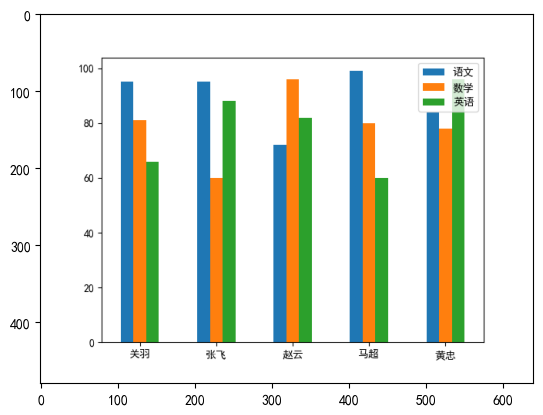

In [ ]:
plt.imshow(array15)

In [ ]:
array10

array([[ 84,  94,  82],
       [ 96,  63,  97],
       [ 82,  96,  77],
       [ 97,  99, 100],
       [ 63,  73,  88]])

In [ ]:
array10[4, 2]

88

In [ ]:
array10[3, 1]

99

In [ ]:
array10[3:, 1:]

array([[ 99, 100],
       [ 73,  88]])

In [ ]:
array10[:3, :2]

array([[84, 94],
       [96, 63],
       [82, 96]])

In [ ]:
array10[2:3]

array([[82, 96, 77]])

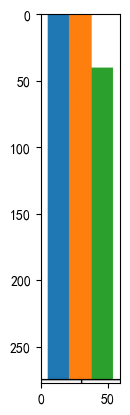

In [ ]:
plt.imshow(array15[152:430, 100:160])

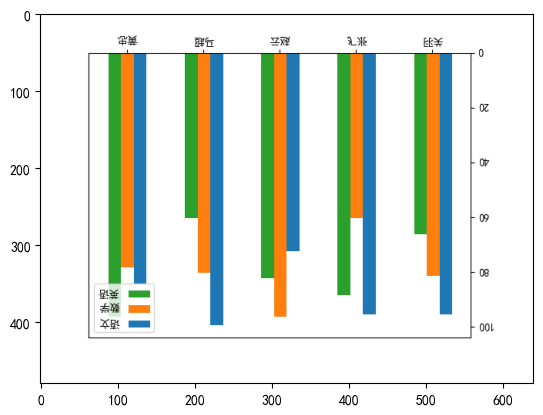

In [ ]:
plt.imshow(array15[::-1, ::-1])

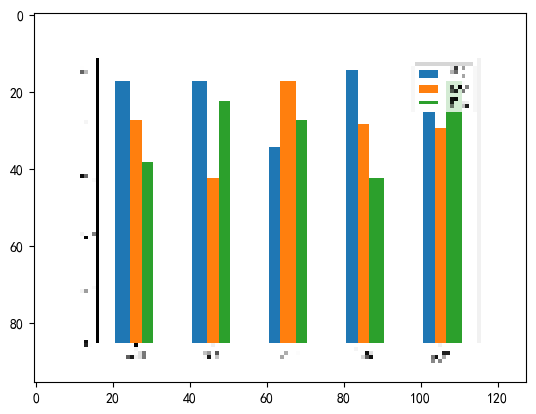

In [ ]:
plt.imshow(array15[::5, ::5])

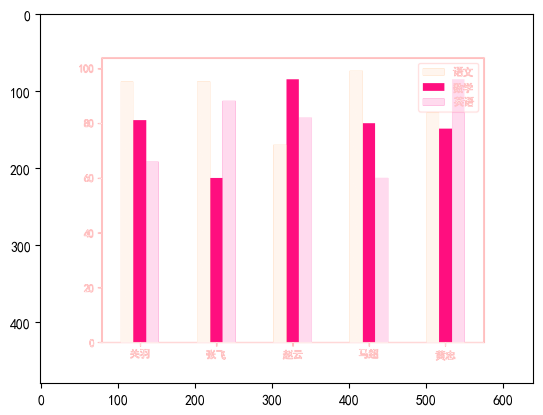

In [ ]:
plt.imshow(array15[:, :, ::-1])

In [ ]:
array2[[0, 1, 2, -1, -2, -3, 10, 20, 30]]

array([ 1,  2,  3, 99, 98, 97, 11, 21, 31])

In [ ]:
array10[[0, 1, 2,], [0, 1, 1]]

array([84, 63, 96])

In [ ]:
array2[array2 > 80]

array([81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
       98, 99])

In [ ]:
array16 = np.arange(1, 10)
array16

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
array16[(array16 > 5) & (array16 % 2 != 0)]

array([7, 9])

In [ ]:
array16[(array16 > 5) | (array16 % 2 != 0)]

array([1, 3, 5, 6, 7, 8, 9])

In [ ]:
array16[(array16 > 5) | ~(array16 % 2 != 0)]

array([2, 4, 6, 7, 8, 9])

In [ ]:
array10[array10 >= 80]

array([ 84,  94,  82,  96,  97,  82,  96,  97,  99, 100,  88])